**Follow the above steps to find dividends, dividend growth rate, and DCF of  5 stocks in SET50, namely**




1.  PTT
2.  AOT
3.  KBANK
4.  CPALL
5.  ADVANC



---


**Here, you will use only the data from 2016-01-01 to 2020-12-31




In [3]:
import pandas as pd
from pandas_datareader import data
import seaborn as sns
import matplotlib.pyplot as plt
%mathplotlib inline
%config InlineBackend.figure_format='retina'

UsageError: Line magic function `%mathplotlib` not found.


# Get Data from Yahoo Finance

In [6]:
s = ['PTT','AOT','KBANK','CPALL','ADVANC']
stocks = pd.Series(s)+'.bk'
df = data.DataReader(stocks, data_source="yahoo", 
start='2016-01-01', 
end='2020-12-31')
df.head()


Attributes  Adj Close                                                \
Symbols        PTT.bk     AOT.bk    KBANK.bk   CPALL.bk   ADVANC.bk   
Date                                                                  
2016-01-04  19.659714  32.061298  129.251404  34.827610  115.078918   
2016-01-05  18.751074  31.780874  127.936928  35.943882  105.421974   
2016-01-06  18.833673  31.780874  129.689514  36.613644  110.652824   
2016-01-07  17.264202  31.500456  126.184387  35.720627  108.238594   
2016-01-08  17.759827  31.593922  128.375076  37.060154  115.883698   

Attributes      Close                                         ...       Open  \
Symbols        PTT.bk     AOT.bk KBANK.bk CPALL.bk ADVANC.bk  ...     PTT.bk   
Date                                                          ...              
2016-01-04  23.799999  34.299999    147.5    39.00     143.0  ...  24.799999   
2016-01-05  22.700001  34.000000    146.0    40.25     131.0  ...  23.900000   
2016-01-06  22.799999  34.000000    148.0    41.00     137.5  ...  22.500000   
2016-01-07  20.900000  33.700001    144.0    40.00     134.5  ...  21.500000   
2016-01-08  21.500000  33.799999    146.5    41.50     144.0  ...  21.299999   

Attributes                                              Volume              \
Symbols        AOT.bk KBANK.bk CPALL.bk ADVANC.bk       PTT.bk      AOT.bk   
Date                                                                         
2016-01-04  34.900002    150.0    39.25     149.0   57964000.0  30288000.0   
2016-01-05  34.400002    147.5    39.50     144.0   88229000.0  31804000.0   
2016-01-06  34.000000    146.0    40.50     128.5   65320000.0  27878000.0   
2016-01-07  33.799999    145.5    40.00     133.0  182186000.0  30974000.0   
2016-01-08  33.900002    145.0    40.25     137.0  108961000.0  27068000.0   

Attributes                                     
Symbols      KBANK.bk    CPALL.bk   ADVANC.bk  
Date                                           
2016-01-04  8013300.0  15918200.0  24880200.0  
2016-01-05  8045800.0  26932400.0  59681500.0  
2016-01-06  5617300.0  26179400.0  59203500.0  
2016-01-07  8933200.0  18699800.0  32742400.0  
2016-01-08  6479200.0  20330700.0  26585900.0  

[5 rows x 30 columns]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1218 entries, 2016-01-04 to 2020-12-30
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Adj Close, PTT.bk)     1218 non-null   float64
 1   (Adj Close, AOT.bk)     1218 non-null   float64
 2   (Adj Close, KBANK.bk)   1218 non-null   float64
 3   (Adj Close, CPALL.bk)   1218 non-null   float64
 4   (Adj Close, ADVANC.bk)  1218 non-null   float64
 5   (Close, PTT.bk)         1218 non-null   float64
 6   (Close, AOT.bk)         1218 non-null   float64
 7   (Close, KBANK.bk)       1218 non-null   float64
 8   (Close, CPALL.bk)       1218 non-null   float64
 9   (Close, ADVANC.bk)      1218 non-null   float64
 10  (High, PTT.bk)          1218 non-null   float64
 11  (High, AOT.bk)          1218 non-null   float64
 12  (High, KBANK.bk)        1218 non-null   float64
 13  (High, CPALL.bk)        1218 non-null   float64
 14  (High, ADVANC.bk)     

In [17]:
df.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-25', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', name='Date', length=1218, freq=None)

In [18]:
df['High']

Symbols,PTT.bk,AOT.bk,KBANK.bk,CPALL.bk,ADVANC.bk
Date,,,,,
2016-01-04,25.000000,35.099998,150.0,40.00,149.5
2016-01-05,24.100000,34.500000,148.0,40.50,144.5
2016-01-06,22.900000,34.299999,149.0,41.75,139.0
2016-01-07,21.600000,33.799999,146.5,41.00,138.0
2016-01-08,21.700001,34.099998,147.0,41.75,144.0
...,...,...,...,...,...
2020-12-24,41.500000,62.000000,115.5,59.75,179.5
2020-12-25,42.250000,62.500000,116.5,59.50,180.0
2020-12-28,42.750000,63.000000,116.0,59.50,180.0


In [19]:
df['Low']

Symbols,PTT.bk,AOT.bk,KBANK.bk,CPALL.bk,ADVANC.bk
Date,,,,,
2016-01-04,23.799999,33.900002,146.0,39.00,141.0
2016-01-05,22.500000,33.900002,145.0,39.25,131.0
2016-01-06,22.200001,33.799999,145.5,40.50,128.0
2016-01-07,20.600000,33.299999,144.0,40.00,131.5
2016-01-08,20.900000,33.599998,145.0,40.00,135.0
...,...,...,...,...,...
2020-12-24,40.750000,60.250000,112.0,58.50,176.5
2020-12-25,41.250000,61.500000,114.0,59.00,178.5
2020-12-28,41.000000,61.500000,111.5,58.00,176.5


In [22]:
ds=df.stack()
ds

Attributes             Adj Close       Close        High         Low  \
Date       Symbols                                                     
2016-01-04 PTT.bk      19.659714   23.799999   25.000000   23.799999   
           AOT.bk      32.061298   34.299999   35.099998   33.900002   
           KBANK.bk   129.251404  147.500000  150.000000  146.000000   
           CPALL.bk    34.827610   39.000000   40.000000   39.000000   
           ADVANC.bk  115.078918  143.000000  149.500000  141.000000   
...                          ...         ...         ...         ...   
2020-12-30 PTT.bk      42.500000   42.500000   43.250000   42.250000   
           AOT.bk      62.250000   62.250000   63.250000   61.500000   
           KBANK.bk   113.000000  113.000000  116.000000  112.000000   
           CPALL.bk    58.250000   58.250000   59.500000   58.000000   
           ADVANC.bk  176.000000  176.000000  179.000000  176.000000   

Attributes                  Open      Volume  
Date       Symbols                            
2016-01-04 PTT.bk      24.799999  57964000.0  
           AOT.bk      34.900002  30288000.0  
           KBANK.bk   150.000000   8013300.0  
           CPALL.bk    39.250000  15918200.0  
           ADVANC.bk  149.000000  24880200.0  
...                          ...         ...  
2020-12-30 PTT.bk      43.250000  67293300.0  
           AOT.bk      62.750000  21500800.0  
           KBANK.bk   116.000000  13312200.0  
           CPALL.bk    59.250000  22508600.0  
           ADVANC.bk  179.000000   7337300.0  

[6090 rows x 6 columns]

In [23]:
ds = df.stack().reset_index()
ds.head()

Attributes,Date,Symbols,Adj Close,Close,High,Low,Open,Volume
0,2016-01-04,PTT.bk,19.659714,23.799999,25.000000,23.799999,24.799999,57964000.0
1,2016-01-04,AOT.bk,32.061298,34.299999,35.099998,33.900002,34.900002,30288000.0
2,2016-01-04,KBANK.bk,129.251404,147.500000,150.000000,146.000000,150.000000,8013300.0
3,2016-01-04,CPALL.bk,34.827610,39.000000,40.000000,39.000000,39.250000,15918200.0
4,2016-01-04,ADVANC.bk,115.078918,143.000000,149.500000,141.000000,149.000000,24880200.0


In [26]:
ds[ds.Symbols=='PTT.bk']

Attributes,Date,Symbols,Adj Close,Close,High,Low,Open,Volume
0,2016-01-04,PTT.bk,19.659714,23.799999,25.000000,23.799999,24.799999,57964000.0
5,2016-01-05,PTT.bk,18.751074,22.700001,24.100000,22.500000,23.900000,88229000.0
10,2016-01-06,PTT.bk,18.833673,22.799999,22.900000,22.200001,22.500000,65320000.0
15,2016-01-07,PTT.bk,17.264202,20.900000,21.600000,20.600000,21.500000,182186000.0
20,2016-01-08,PTT.bk,17.759827,21.500000,21.700001,20.900000,21.299999,108961000.0
...,...,...,...,...,...,...,...,...
6065,2020-12-24,PTT.bk,41.250000,41.250000,41.500000,40.750000,40.750000,45405500.0
6070,2020-12-25,PTT.bk,42.000000,42.000000,42.250000,41.250000,41.250000,32414000.0
6075,2020-12-28,PTT.bk,41.000000,41.000000,42.750000,41.000000,42.250000,60698100.0
6080,2020-12-29,PTT.bk,42.500000,42.500000,42.500000,41.000000,41.250000,41046600.0


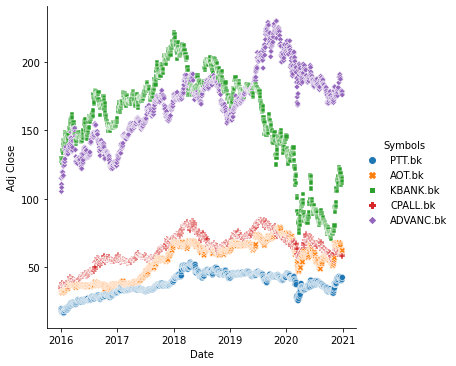

In [15]:
sns.relplot(x='Date', y='Adj Close',
    hue='Symbols',
    style='Symbols',
    data=df.stack()
)

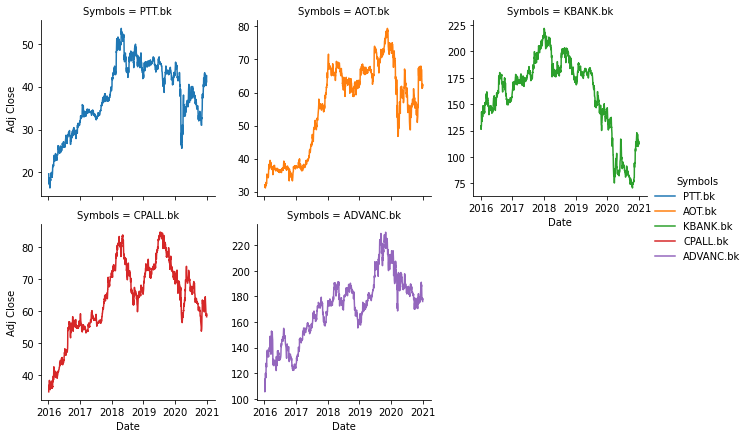

In [9]:
sns.relplot(x='Date', y='Adj Close', col='Symbols', col_wrap=3,
    hue='Symbols',
    kind='line',
    height=3,
    facet_kws ={'sharey': False},
    data=df.stack()
)

# Dividend

Text(0, 0.5, 'Difference in Change')

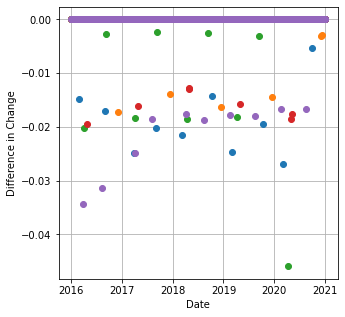

In [10]:
adj_close = df['Adj Close'] # adjusted close prices
pct_adj_close = adj_close.pct_change(1) # find daily percent changes 
close = df['Close'] # close price
pct_close = close.pct_change(1) # find daily percent changes 
plt.figure(figsize=(5,5))
plt.plot(pct_close- pct_adj_close, "o")
plt.grid()
plt.xlabel("Date")
plt.ylabel("Difference in Change")

In [56]:
delta = pct_close- pct_adj_close 
threshold = -0.001 # We pick threshold = -0.001 from the graph.
delta = delta[delta<threshold] # screen only the location where differences is less than -0.001
print("The dividens are paid out on:")
for date in delta.index:
  print(date.date())

The dividens are paid out on:
2016-01-04
2016-01-05
2016-01-06
2016-01-07
2016-01-08
2016-01-11
2016-01-12
2016-01-13
2016-01-14
2016-01-15
2016-01-18
2016-01-19
2016-01-20
2016-01-21
2016-01-22
2016-01-25
2016-01-26
2016-01-27
2016-01-28
2016-01-29
2016-02-01
2016-02-02
2016-02-03
2016-02-04
2016-02-05
2016-02-08
2016-02-09
2016-02-10
2016-02-11
2016-02-12
2016-02-15
2016-02-16
2016-02-17
2016-02-18
2016-02-19
2016-02-23
2016-02-24
2016-02-25
2016-02-26
2016-02-29
2016-03-01
2016-03-02
2016-03-03
2016-03-04
2016-03-07
2016-03-08
2016-03-09
2016-03-10
2016-03-11
2016-03-14
2016-03-15
2016-03-16
2016-03-17
2016-03-18
2016-03-21
2016-03-22
2016-03-23
2016-03-24
2016-03-25
2016-03-28
2016-03-29
2016-03-30
2016-03-31
2016-04-01
2016-04-04
2016-04-05
2016-04-07
2016-04-08
2016-04-11
2016-04-12
2016-04-18
2016-04-19
2016-04-20
2016-04-21
2016-04-22
2016-04-25
2016-04-26
2016-04-27
2016-04-28
2016-04-29
2016-05-03
2016-05-04
2016-05-09
2016-05-10
2016-05-11
2016-05-12
2016-05-13
2016-05-16
20